# Capstone Project I
# Individual Health Insurance Market Place

In [81]:
# Import libraries 
import pandas as pd
import numpy as np
from collections import Counter
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
#import sys
#import matplotlib
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

## Read FIPS Median Income, Unemployment and Health Insurance Marketplace Enrollees - 2017

Use the Area Health Resource File (AHRF) downloaded from the Health Resource and Services Administration website. The file combines health and other socioeconomic data sources on specific geographic areas in the US. I downloaded the set of files with measures at the County level.

The data file used here was directly downloaded from the HRSA website (AHRF2019.asc). The data dictionary was created using the SAS program provided to read the asc file. See program AHRF_Dictionary.ipynb.
Source: https://data.hrsa.gov/data/download

In [82]:
# Set paths and file names
datapath='C:\\Users\\l_gas\\Documents\\Development\\SpringBoard_DataScience\\HealthInsuranceData'
data2019= datapath + "\\AHRF\\AHRF_2018-2019\\DATA\\AHRF2019.asc"

In [83]:
# Import Area Research File data - Median household income (2017), Health insurance market place enrollees (2017)
# Identify variables
ahrfdata = pd.read_csv('AHRF2019_dict.csv',index_col=0)
var_selection = ahrfdata[(ahrfdata.Label.str.contains("FIPS")) | (ahrfdata.Label.str.contains("CBSA")) | (ahrfdata.Name == "f12424") | (ahrfdata.Name == "f00008") | (ahrfdata.Label == "Median Household Income 2017") | (ahrfdata.Label == "Hlth Ins Marketplace Enrollees 2017") | (ahrfdata.Label == "Unemployment Rate, 16+ 2017") | (ahrfdata.Label == "Population Estimate 2017")] 
position = [(var_selection.iloc[i,0]-1,int(var_selection.iloc[i,3])) for i in range(len(var_selection))]
print(var_selection)

# Import selected columns
area_char = pd.read_fwf(data2019,colspecs = position, header=None)
area_char.columns = ['fips', 'state', 'st','fips_st','fips_county', 'CBSA', 'CBSA_Name', 'CBSA_Ind', 'CBSA_Status','Pop2017','MedIncome2017','IndMarketEnroll2017','Unemployment']

area_char['Pop2017'] = area_char['Pop2017'].apply(pd.to_numeric, errors='coerce')
area_char['MedIncome2017'] = area_char['MedIncome2017'].apply(pd.to_numeric, errors='coerce')
area_char['IndMarketEnroll2017'] = area_char['IndMarketEnroll2017'].apply(pd.to_numeric, errors='coerce')
# Unemployment rate is in percentage form and has one decimal implied (see documentation)
area_char['Unemployment'] = area_char['Unemployment'].apply(pd.to_numeric, errors='coerce')/10


      Pos_Start      Name  String  Pos_End                                              Label
1             2    f00002    True      6.0                      Header - FIPS St and Cty Code
7            46    f00008    True     64.0                                         State Name
8            65    f12424    True     66.0                            State Name Abbreviation
11          122    f00011    True    123.0                                    FIPS State Code
12          124    f00012    True    126.0                                   FIPS County Code
19          167  f1389118    True    171.0  Core Based Stat Area Code(CBSA) Metropolitan/M...
20          172  f1389218    True    221.0  Core Based Stat Area Name(CBSA) Metropolitan/M...
21          222  f1406718    True    222.0  CBSA Indicator Code 0 = Not, 1 = Metro, 2 = Mi...
22          223  f1419518    True    230.0        CBSA County Status Central or Outlying 2018
4508      16425  f1198417   False  16432.0                  

In [84]:
## Check there are unique entries per each FIPS code

print("Number of Lines in the area_char file: ",len(area_char))
print("Number of distinct FIPS code entries in the area_char file: ",len(Counter(area_char['fips'])))
print("Descriptive Measures from the area_char file (includes ALL FIPS):")
print(area_char.describe())


Number of Lines in the area_char file:  3230
Number of distinct FIPS code entries in the area_char file:  3230
Descriptive Measures from the area_char file (includes ALL FIPS):
               fips      fips_st  fips_county          CBSA     CBSA_Ind       Pop2017  MedIncome2017  IndMarketEnroll2017  Unemployment
count   3230.000000  3230.000000  3230.000000   1916.000000  3220.000000  3.221000e+03    3141.000000          2719.000000   3219.000000
mean   31423.921981    31.320743   103.178947  29872.829332     0.801242  1.022116e+05   51090.529449          3384.237955      4.825194
std    16380.125272    16.365500   107.218177  11561.589118     0.756210  3.291528e+05   13497.965734         13418.161762      2.185314
min     1001.000000     1.000000     1.000000  10100.000000     0.000000  8.800000e+01   22679.000000             0.000000      1.600000
25%    19029.500000    19.000000    35.000000  19340.000000     0.000000  1.117300e+04   42275.000000           325.500000      3.500000
5

## Read Health Insurance Individual Market Plans - Federal Mandated Markets

In [85]:
# Import Health Insurance Individual Market Plans data

plans_2018 = pd.read_csv(r'C:\Users\l_gas\Documents\Development\SpringBoard_DataScience\HealthInsuranceData\IndivMarketPlans\QHP_PY2018_Medi-_Indi-_Land.csv',
                   low_memory=False, usecols=['State Code','FIPS County Code','County Name',
                'Metal Level','Issuer Name','HIOS Issuer ID','Plan ID (Standard Component)','Plan Marketing Name','Plan Type',
                'Standardized Plan Design','Rating Area','Child Only Offering','Source','Accreditation',
                'Adult Dental ','Child Dental ','EHB Percent of Total Premium',
                'Premium Scenarios','Premium Child Age 0-14','Premium Child Age 18','Premium Adult Individual Age 21',
                'Premium Adult Individual Age 27','Premium Adult Individual Age 30 ','Premium Adult Individual Age 40 ',
                'Premium Adult Individual Age 50 ','Premium Adult Individual Age 60 '])
plans_2018 = plans_2018.rename(columns={"State Code": "State", "FIPS County Code": "fips", "HIOS Issuer ID": "Issuer_ID", "Premium Scenarios":"Scenarios","Premium Child Age 0-14": "Premium_chld",\
                            "Premium Child Age 18":"Premium_18","Premium Adult Individual Age 21": "Premium_21","Premium Adult Individual Age 27": "Premium_27",\
                            "Premium Adult Individual Age 30 ": "Premium_30","Premium Adult Individual Age 40 ": "Premium_40","Premium Adult Individual Age 50 ": "Premium_50",\
                            "Premium Adult Individual Age 60 ": "Premium_60"})


In [86]:
print(plans_2018.describe())


               fips     Issuer_ID  Scenarios  Premium_chld    Premium_18    Premium_21    Premium_27    Premium_30    Premium_40    Premium_50    Premium_60
count  39348.000000  39348.000000        0.0  39348.000000  39348.000000  39348.000000  39348.000000  39348.000000  39348.000000  39348.000000  39348.000000
mean   30717.150554  47555.950646        NaN    299.905370    355.726905    393.943064    414.407215    448.285120    504.372324    705.132349   1070.460071
std    15533.700753  26056.406044        NaN     89.664127    108.471209    116.399537    122.622838    132.397626    148.882845    208.184728    315.977377
min     1001.000000  10091.000000        NaN    113.100000    134.700000    147.840000    154.930000    167.800000    188.940000    264.040000    401.230000
25%    18005.000000  26539.000000        NaN    236.920000    279.360000    312.160000    328.300000    355.190000    399.570000    558.490000    848.210000
50%    29161.000000  38166.000000        NaN    287.790000

In [87]:
# Group Issuers - Parent
issuer = pd.DataFrame(Counter(plans_2018['Issuer Name']).keys())
issuer.columns = ["Original Name"]

issuer["Name"] = ""
issuer["Name"][(issuer["Original Name"].str.contains("Blue Cross")) & (issuer["Original Name"].str.contains("Blue Cross"))] = "Blue Cross Blue Shield"
issuer["Name"][(issuer["Original Name"].str.contains("BCBS")) & (issuer["Name"]=="")] = "Blue Cross Blue Shield"
issuer["Name"][(issuer["Original Name"].str.contains("BlueCross")) & (issuer["Original Name"].str.contains("BlueCross")) & (issuer["Name"]=="")] = "Blue Cross Blue Shield"
issuer["Name"][(issuer["Original Name"].str.contains("CareFirst")) & (issuer["Original Name"].str.contains("Blue")) & (issuer["Name"]=="")] = "Blue Cross Blue Shield"
issuer["Name"][(issuer["Original Name"].str.contains("Highmark")) & (issuer["Name"]=="")]  = "Highmark"
issuer["Name"][(issuer["Original Name"].str.contains("Molina Healthcare")) & (issuer["Name"]=="")]  = "Molina Healthcare"
issuer["Name"][(issuer["Original Name"].str.contains("Cigna")) & (issuer["Name"]=="")]  = "Cigna"
issuer["Name"][(issuer["Original Name"].str.contains("CareSource")) & (issuer["Name"]=="")]  = "CareSource"
issuer["Name"][(issuer["Original Name"].str.contains("Harvard Pilgrim")) & (issuer["Name"]=="")]  = "Harvard Pilgrim Health Care"
issuer["Name"][(issuer["Original Name"].str.contains("Kaiser Foundation")) & (issuer["Name"]=="")]  = "Kaiser Foundation Health Plan"
issuer["Name"][(issuer["Name"]=="")]  = issuer["Original Name"][(issuer["Name"]=="")] 

#print(issuer.sort_values("Name"))

plans_2018 = pd.merge(left=plans_2018, right=issuer, left_on='Issuer Name', right_on='Original Name')


In [88]:
# Group data by CBSA (FIPS) code. 
# Generate Measures: number of plans offered, number of issuers and average premiums for individual adults (multple ages)

plan_pr = plans_2018.groupby('fips')[['Premium_chld','Premium_18','Premium_21','Premium_27','Premium_30','Premium_40','Premium_50','Premium_60']].agg(['mean'])
plan_pr.columns = ['avg_premium_chld','avg_premium_18','avg_premium_21','avg_premium_27','avg_premium_30','avg_premium_40','avg_premium_50','avg_premium_60']
plan_cnt = plans_2018.groupby('fips')[['Premium_30']].agg(['count'])
plan_cnt.columns = ['count_plans']
plan_inscnt = plans_2018.groupby('fips')[['Issuer_ID']].agg(['nunique'])
plan_inscnt.columns = ['count_issuers']

Number of Counties: 2722


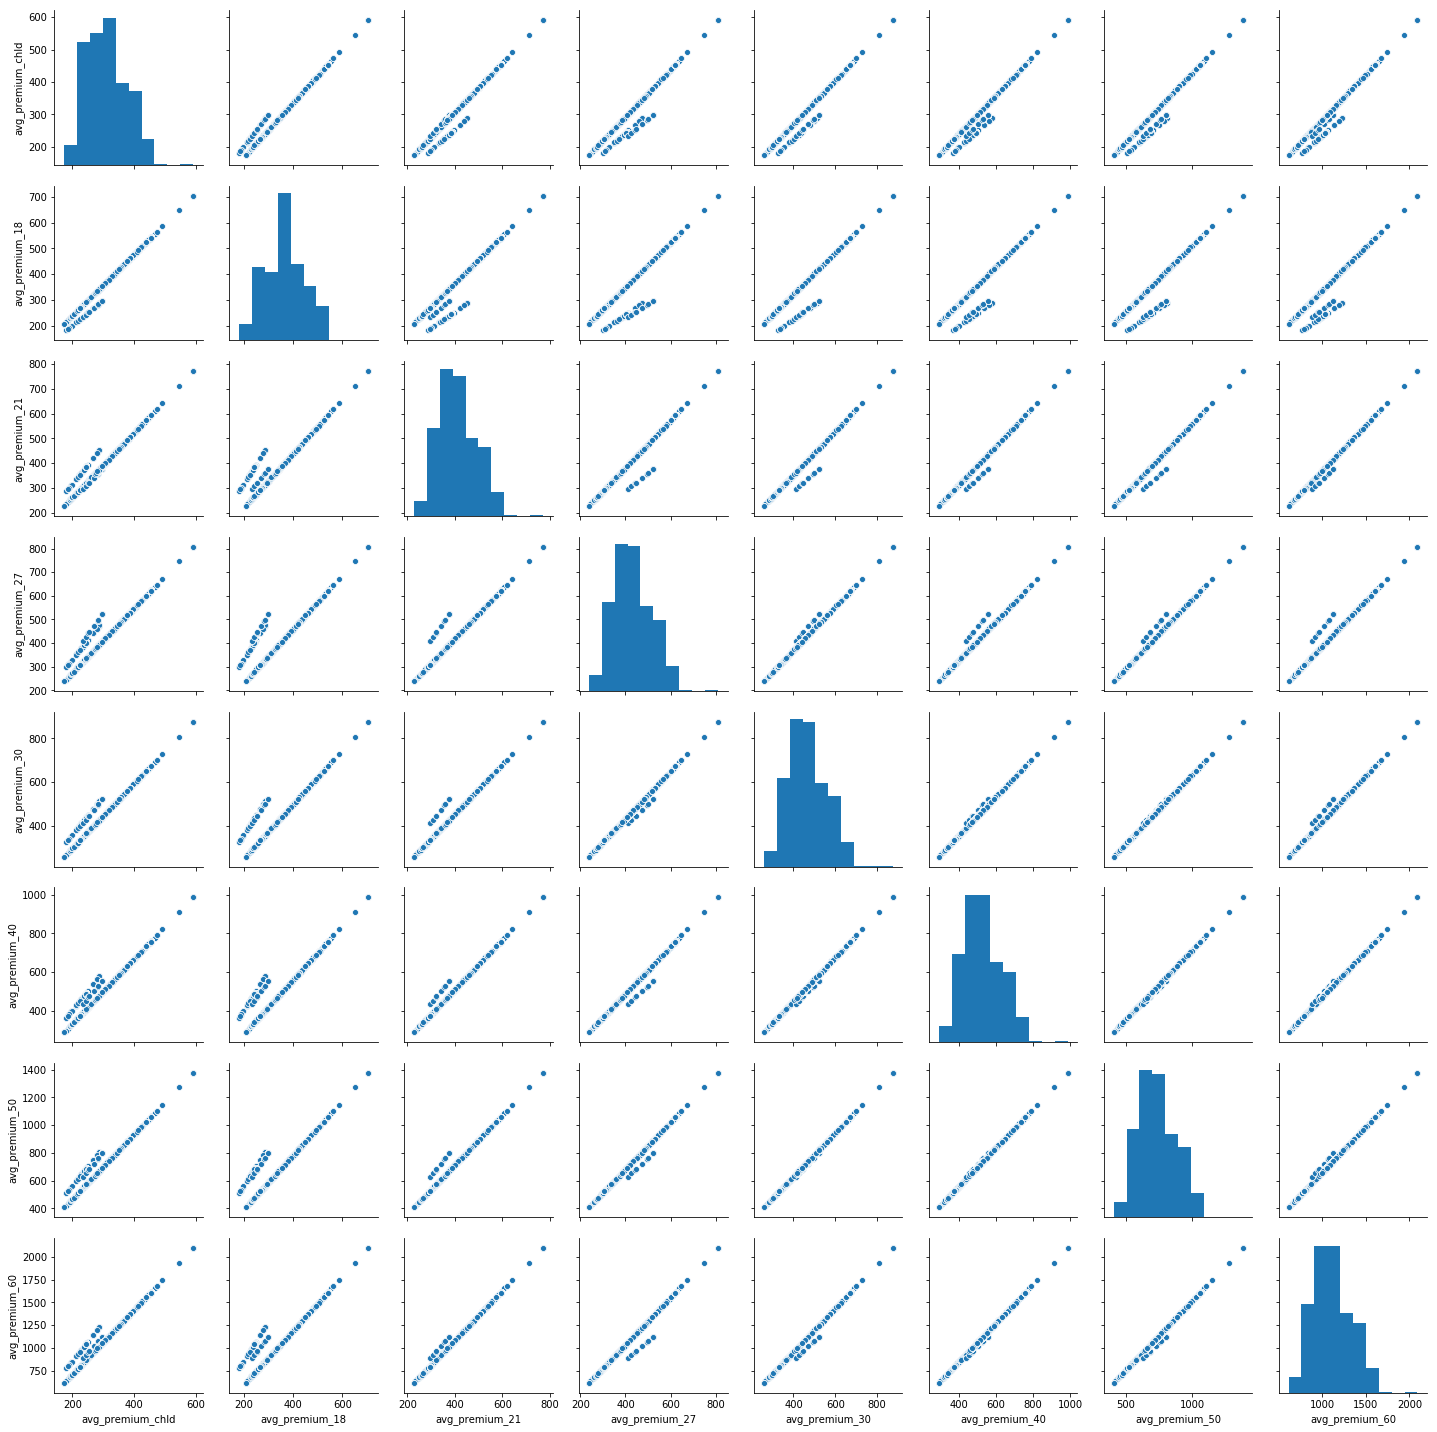

In [89]:
# Compare premiums across age groups

print("Number of Counties:",len(plan_pr))
# Look at correlation between Premiums for each age group level
sns.pairplot(plan_pr.loc[:,(['avg_premium_chld','avg_premium_18','avg_premium_21','avg_premium_27','avg_premium_30','avg_premium_40','avg_premium_50','avg_premium_60'])])


In [90]:
# Look at correlation between number of plans for each age group level
plan_cntall = plans_2018.groupby('fips')[['Premium_chld','Premium_18','Premium_21','Premium_27','Premium_30','Premium_40','Premium_50','Premium_60']].agg(['count'])
plncnt_min = plan_cntall.loc[:,(['Premium_chld','Premium_18','Premium_21','Premium_27','Premium_30','Premium_40','Premium_50','Premium_60'],"count")].min(axis=1)
plncnt_max = plan_cntall.loc[:,(['Premium_chld','Premium_18','Premium_21','Premium_27','Premium_30','Premium_40','Premium_50','Premium_60'],"count")].max(axis=1)
print("Number of FIPS codes with different number of Plans Per Age Group:",sum(plncnt_min-plncnt_max))

Number of FIPS codes with different number of Plans Per Age Group: 0


## Combine Plan Information and FIP Population Measures

In [91]:
plans_ahrf = pd.merge(left=plan_cnt, right=plan_inscnt, left_on='fips', right_on='fips')
plans_ahrf = pd.merge(left=plans_ahrf, right=area_char, left_on='fips', right_on='fips')
plans_ahrf = pd.merge(left=plans_ahrf, right=plan_pr, left_on='fips', right_on='fips')

In [92]:
print(len(plans_ahrf))
print(plans_ahrf.describe())


2722
               fips  count_plans  count_issuers      fips_st  fips_county          CBSA     CBSA_Ind       Pop2017  MedIncome2017  IndMarketEnroll2017  Unemployment  avg_premium_chld  \
count   2722.000000  2722.000000    2722.000000  2722.000000  2722.000000   1558.000000  2721.000000  2.721000e+03    2721.000000          2718.000000   2721.000000       2722.000000   
mean   31350.903012    14.455547       1.710507    31.239897   111.005878  29464.891528     0.784638  8.348002e+04   49720.981624          3385.483076      4.642484        310.807666   
std    14970.806015    10.558827       1.004195    14.952237   112.759340  11401.271870     0.770265  2.428415e+05   12610.015798         13420.473727      1.659348         63.518228   
min     1001.000000     2.000000       1.000000     1.000000     1.000000  10100.000000     0.000000  1.340000e+02   22679.000000             0.000000      1.700000        174.175714   
25%    19135.500000     7.000000       1.000000    19.000000    3

There are four county areas with missing values under the individual Market Enrollment column, and one county with missing values under the 2017 Median Income, 2017 Population, and Unemployment columns accounting for a total of four counties with some missing values. Since this is a very small portion of the total number of observations (4/2722), we exclude those four rows from the analysis.

In [93]:
print(plans_ahrf[(plans_ahrf.Pop2017.isnull() | plans_ahrf.MedIncome2017.isnull() | plans_ahrf.IndMarketEnroll2017.isnull() | plans_ahrf.Unemployment.isnull())])
plans_ahrf = plans_ahrf[(plans_ahrf.Pop2017.notnull() & plans_ahrf.MedIncome2017.notnull() & plans_ahrf.IndMarketEnroll2017.notnull() & plans_ahrf.Unemployment.notnull())]
plans_ahrf = plans_ahrf.reset_index(drop=True)
print("Total Number of Rows with no Missing Values",len(plans_ahrf))

       fips  count_plans  count_issuers     state  st  fips_st  fips_county     CBSA           CBSA_Name  CBSA_Ind CBSA_Status  Pop2017  MedIncome2017  IndMarketEnroll2017  Unemployment  \
81     2158            5              1    Alaska  AK        2          158      NaN                 NaN       0.0         NaN   8202.0        31250.0                  NaN          20.1   
2305  48301           13              2     Texas  TX       48          301  37780.0  Pecos, TX Micro SA       2.0    Outlying    134.0        65203.0                  NaN           5.0   
2351  48393           13              2     Texas  TX       48          393  37420.0  Pampa, TX Micro SA       2.0    Outlying    938.0        67688.0                  NaN           3.7   
2534  51515           10              1  Virginia  VA       51          515      NaN                 NaN       NaN         NaN      NaN            NaN                  NaN           NaN   

      avg_premium_chld  avg_premium_18  avg_premium_21

In [94]:
plans_ahrf.to_json("./plans_ahrf.json", compression=None)
plans_ahrf.to_pickle("./plans_ahrf.pkl", compression=None)
